In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
dataset.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
dataset.shape

(195, 43)

In [4]:
dataset.drop(['Type','AREA','REG','DEV','Coverage'], axis=1, inplace=True)
dataset.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
dataset.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
dataset.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
all(isinstance(column, str) for column in dataset.columns)

False

In [7]:
dataset.columns = list (map(str, dataset.columns))

all(isinstance(column, str) for column in dataset.columns)

True

In [8]:
dataset.set_index('Country', inplace=True)

In [9]:
dataset.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [10]:
dataset['Total']=dataset.sum(axis=1)
dataset.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [11]:
years = list (map(str, range(1980, 2014)))

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [13]:
dataset.sort_values(['Total'], ascending=False, axis=0, inplace=True)

data_top5 = dataset.head()
data_top5 = data_top5[years].transpose()
data_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


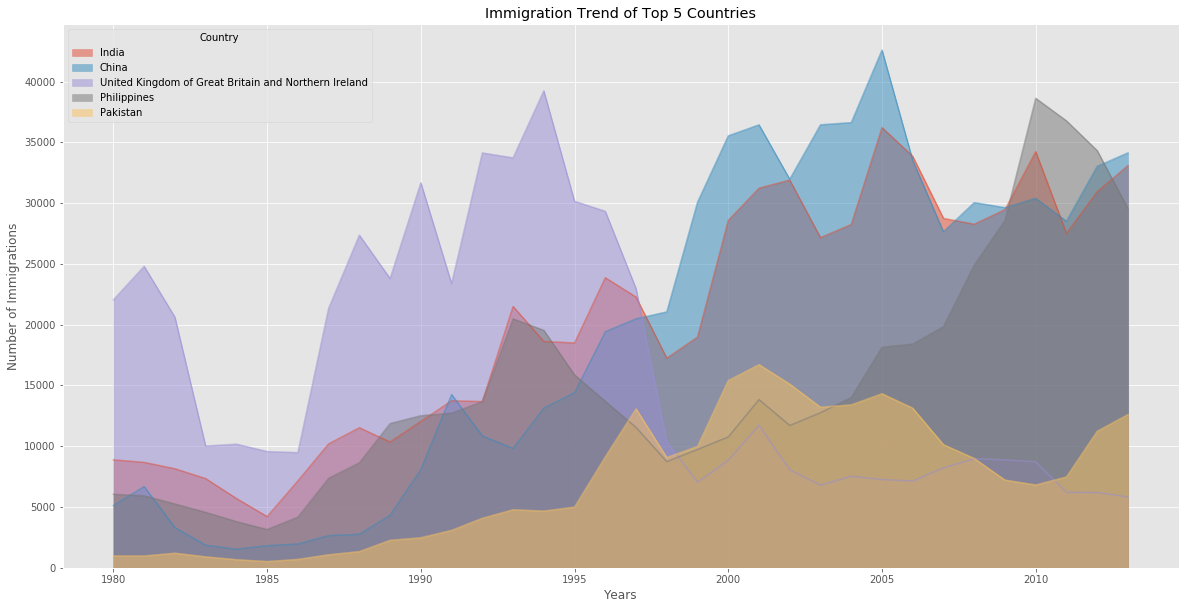

In [14]:
data_top5.index = data_top5.index.map(int)
data_top5.plot(kind='area', stacked=False, figsize=(20,10))
plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrations')
plt.show()

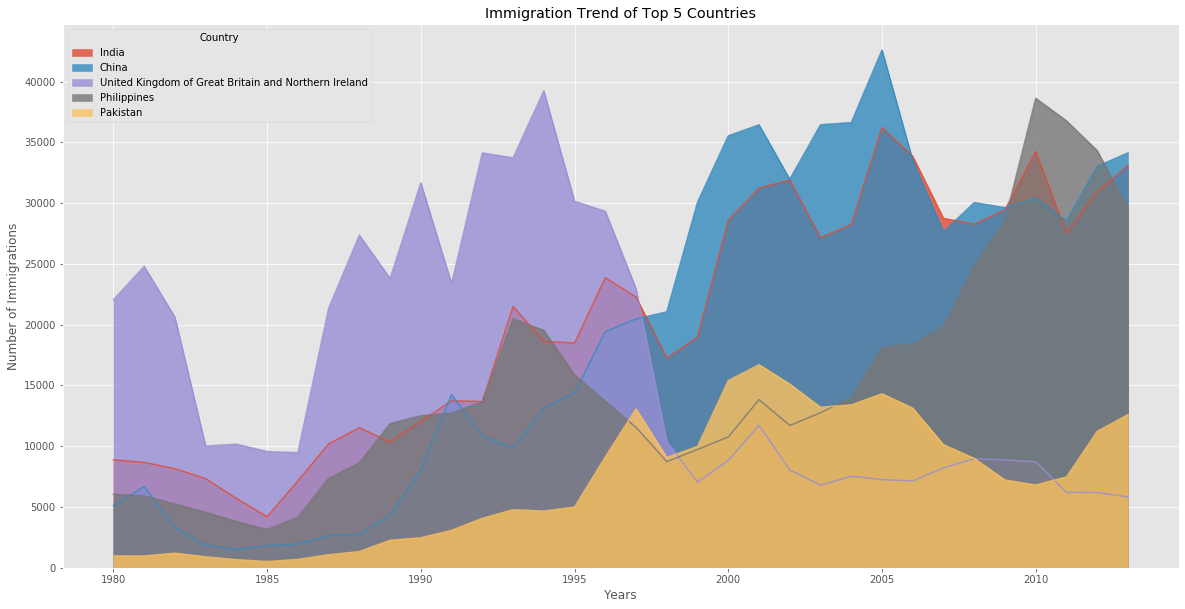

In [15]:
data_top5.index = data_top5.index.map(int)
data_top5.plot(kind='area', alpha=0.8, stacked=False, figsize=(20,10))
plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrations')
plt.show()

Text(0, 0.5, 'Number of Immigrations')

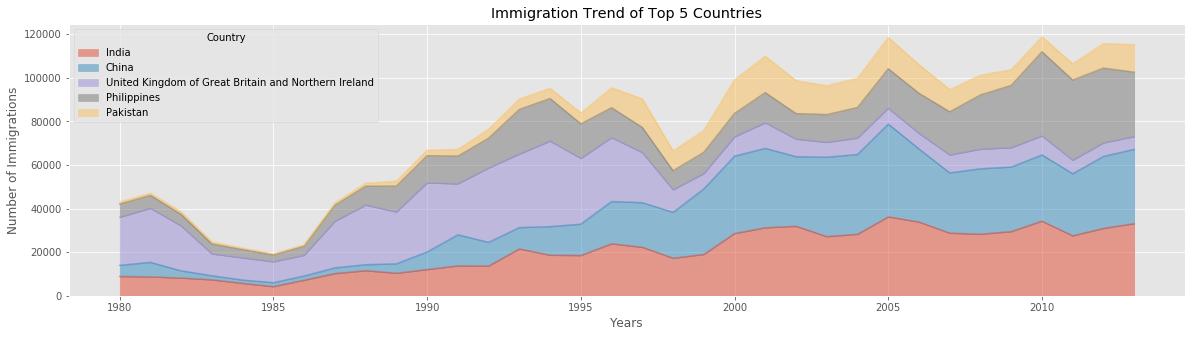

In [16]:
ax = data_top5.plot(kind='area', alpha=0.5, figsize=(20,5))
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrations')

In [17]:
data_least5 = dataset.tail()
data_least5 = data_least5[years]
data_least5 = data_least5.transpose()
data_least5.index = data_least5.index.map(int)

Text(0, 0.5, 'Number of Immigrations')

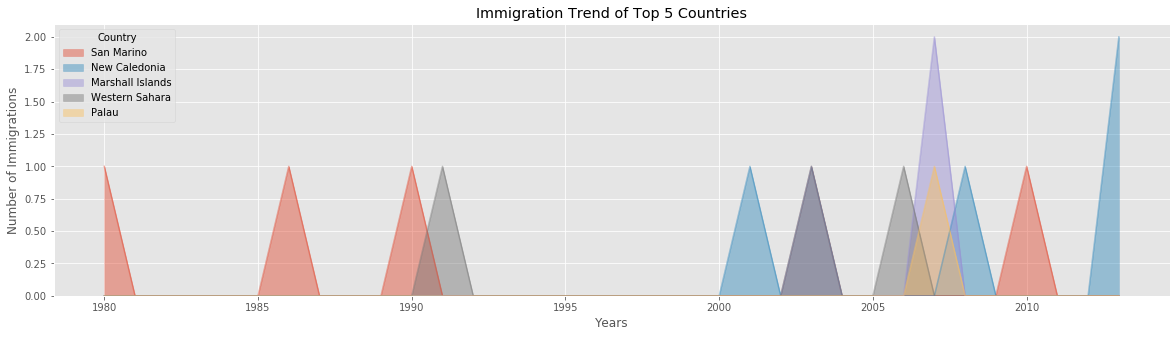

In [18]:
data_least5.plot(kind='area', alpha=0.45, stacked=False, figsize=(20,5))
plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrations')

Text(0, 0.5, 'Number of Immigrations')

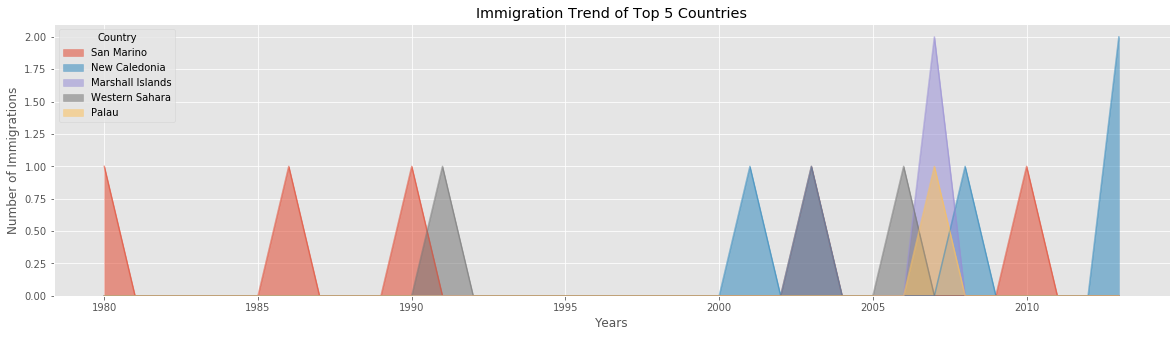

In [19]:
ax = data_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20,5))
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrations')

In [20]:
dataset['2013']

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
                                                        ...  
San Marino                                                  0
New Caledonia                                               2
Marshall Islands                                            0
Western Sahara                                              0
Palau                                                       0
Name: 2013, Length: 195, dtype: int64

In [21]:
count, bin_edges = np.histogram(dataset['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Text(0.5, 0, 'Number of Immigrants')

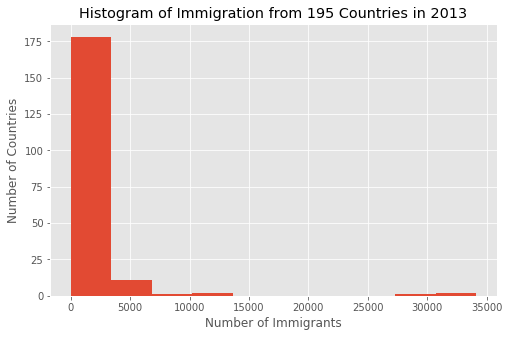

In [22]:
dataset['2013'].plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

Text(0.5, 0, 'Number of Immigrants')

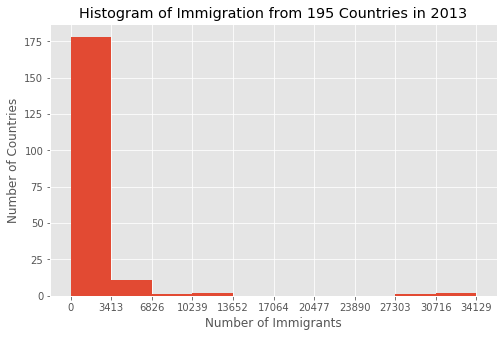

In [23]:
dataset['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

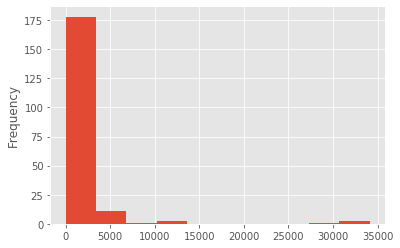

In [24]:
dataset['2013'].plot(kind='hist')

In [25]:
dataset.loc[['Sweden','Denmark','Norway'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59


In [26]:
dataset_t = dataset.loc[['Sweden','Denmark','Norway'], years].transpose()
dataset_t.head()

Country,Sweden,Denmark,Norway
1980,281,272,116
1981,308,293,77
1982,222,299,106
1983,176,106,51
1984,128,93,31


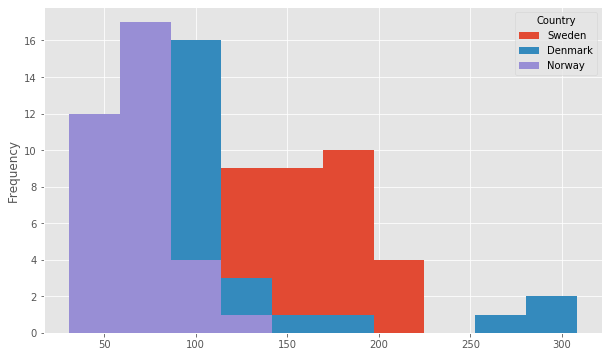

In [27]:
dataset_t.plot(kind='hist', figsize=(10, 6))

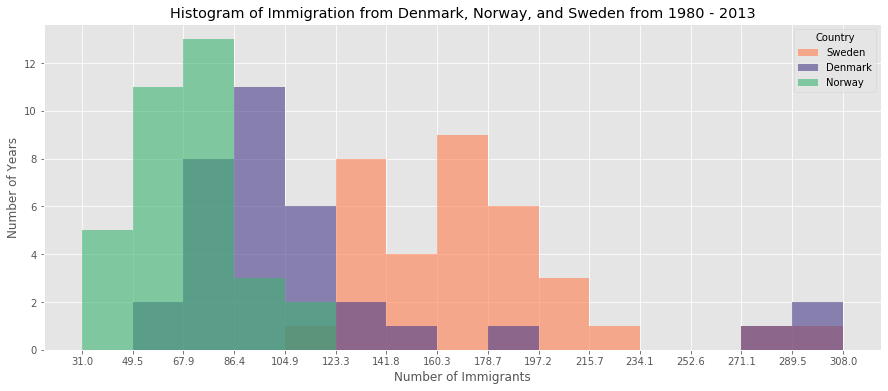

In [28]:
count, bin_edges = np.histogram(dataset_t, 15)
dataset_t.plot(kind='hist',
              figsize=(15, 6),
              bins=15,
              alpha=0.6,
              xticks=bin_edges,
              color = ['coral','darkslateblue','mediumseagreen'])
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

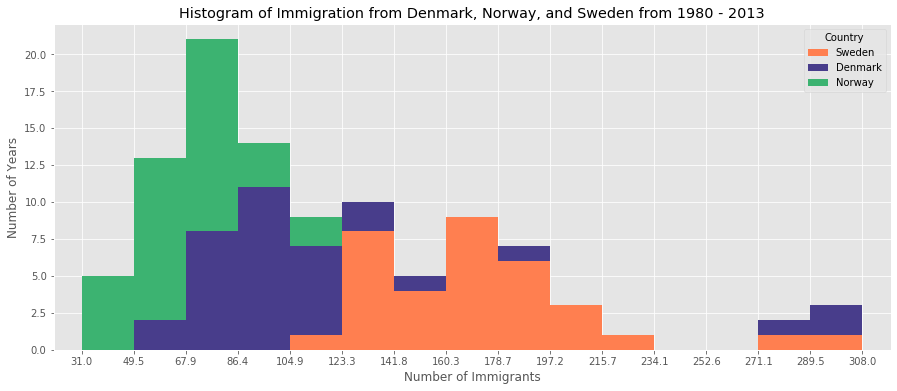

In [29]:
count, bin_edges = np.histogram(dataset_t, 15)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

dataset_t.plot(kind='hist',
              figsize=(15, 6),
              bins=15,
              xticks=bin_edges,
              color = ['coral','darkslateblue','mediumseagreen'],
              stacked=True,
              xlim=(xmin, xmax)
              )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

In [30]:
dataset.loc[['Greece','Albania','Bulgaria'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Greece,1065,953,897,633,580,584,547,765,564,773,...,120,100,74,110,107,119,101,102,146,298
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Bulgaria,24,20,12,33,11,24,33,52,43,85,...,2022,1738,1419,1172,994,784,556,365,451,512


In [31]:
dataset_c2 = dataset.loc[['Greece','Albania','Bulgaria'], years].transpose()
dataset_c2.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


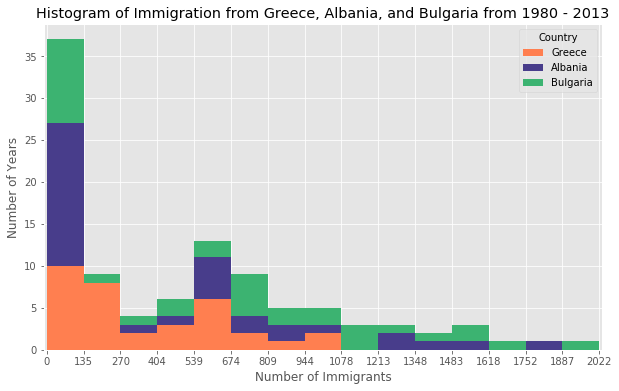

In [32]:
count, bin_edges = np.histogram(dataset_c2, 15)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10
dataset_c2.plot(kind='hist',
               figsize=(10, 6),
               bins=15,
               xticks=bin_edges,
               color=['coral','darkslateblue','mediumseagreen'],
               stacked=True,
               xlim=(xmin, xmax))
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [33]:
data_iceland = dataset.loc['Iceland', years]

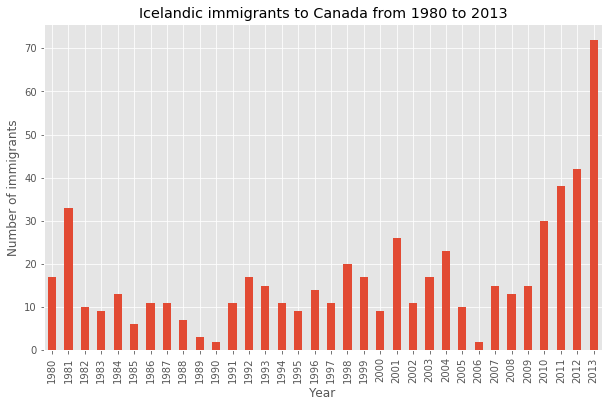

In [34]:
data_iceland.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

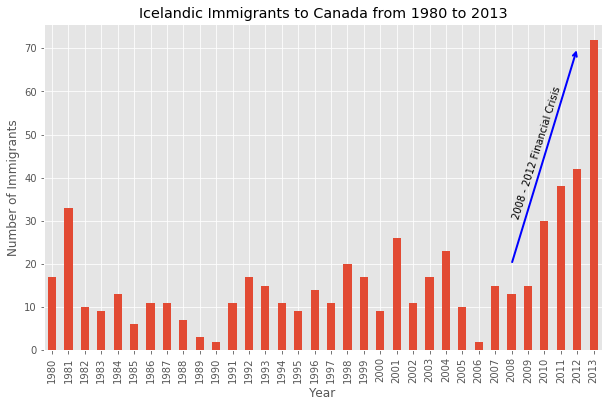

In [77]:
data_iceland.plot(kind='bar', figsize=(10,6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

plt.annotate('',
            xy=(32, 70),
            xytext=(28, 20),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )


plt.annotate('2008 - 2012 Financial Crisis',
             xy=(28, 30),
             rotation=(72.5),
             va='bottom',
             ha='left'
            )
plt.show()

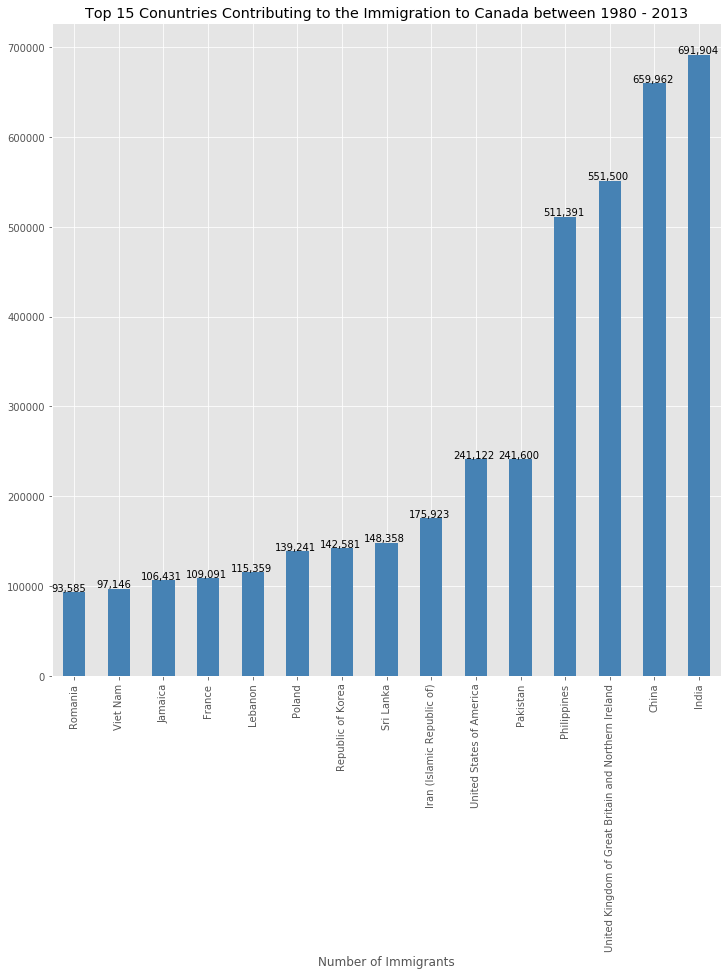

In [198]:
data_top15 = dataset.sort_values(by='Total', ascending=True)
data_top15 = data_top15['Total'].tail(15)
# top15_countries = list(map(str, data_top15.index))
# data_top15 = data_top15.loc[top15_countries, years]

# data_top15 = data_top15.transpose()
# data_top15 = data_top15.loc[years]

data_top15.plot(kind='bar', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
for index, value in enumerate(data_top15): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(index-0.5, value + 1000), color='black')
plt.show()